## Regression as Neural Networks Practical


In [137]:
import pandas    #importing libraries to carry out necessary procedure
import numpy as np
np.random.seed(1337) # for reproducibility
import pandas
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [138]:
dataframe = pandas.read_csv("https://raw.githubusercontent.com/eijaz1/Deep-Learning-in-Keras-Tutorial/master/data/hourly_wages_data.csv") #import data
dataset = dataframe.values   #assign values of the data to the variable 'dataset'

In [139]:
dataframe.head()  #viewing data

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [140]:
X = dataframe.drop(columns=['wage_per_hour']).values   #remove 1st column what remains are the features
Y = dataframe['wage_per_hour'].values #target  

In [141]:
X  #view shape of feature X

array([[ 0,  8, 21, ...,  0,  1,  0],
       [ 0,  9, 42, ...,  0,  1,  0],
       [ 0, 12,  1, ...,  0,  1,  0],
       ...,
       [ 1, 17, 25, ...,  0,  0,  0],
       [ 1, 12, 13, ...,  1,  0,  0],
       [ 0, 16, 33, ...,  0,  1,  0]])

In [142]:
Y.shape   #view shape of target Y

(534,)

In [143]:
dataset.shape  #viewing dataset shape

(534, 10)

- There are 9 inputs
- There is one output
- To predict hourly, weekly, monthly salary of a person over some characteristics.

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3) #splitting data into training and testing

In [145]:
# define the model   (Nueral network model)
def baseline():
    # create model
    model = Sequential()
    
    # add one fully connected layer
    model.add(Dense(units = 8, input_dim=9, activation='relu'))
    # add a fully connected layer for the output
    model.add(Dense(units=1, activation='relu'))    
    # Compile model
    model.compile(loss='mse', optimizer='adam',metrics=[metrics.mse])
    
    return model

In [146]:
model = baseline()  #initialize model

In [147]:
model.summary() #determine number of trainable parameters from the summary

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 80        
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [148]:
history = model.fit(X_train, Y_train, epochs=24, batch_size=4, verbose=1)  #Train the model

Epoch 1/24
94/94 [==============================] - 0s 1ms/step - loss: 52.2107 - mean_squared_error: 52.2107
Epoch 2/24
94/94 [==============================] - 0s 1ms/step - loss: 29.7526 - mean_squared_error: 29.7526
Epoch 3/24
94/94 [==============================] - 0s 1ms/step - loss: 28.2733 - mean_squared_error: 28.2733
Epoch 4/24
94/94 [==============================] - 0s 1ms/step - loss: 27.1817 - mean_squared_error: 27.1817
Epoch 5/24
94/94 [==============================] - 0s 1ms/step - loss: 26.5688 - mean_squared_error: 26.5688
Epoch 6/24
94/94 [==============================] - 0s 1ms/step - loss: 25.8495 - mean_squared_error: 25.8495
Epoch 7/24
94/94 [==============================] - 0s 1ms/step - loss: 25.3874 - mean_squared_error: 25.3874
Epoch 8/24
94/94 [==============================] - 0s 1ms/step - loss: 25.0854 - mean_squared_error: 25.0854
Epoch 9/24
94/94 [==============================] - 0s 1ms/step - loss: 24.6483 - mean_squared_error: 24.6483
Epoch 10/2

In [149]:
prediction = model.predict(X_test)  #Predict test data

In [1]:
mean_squared_error(Y_test, prediction)  #compute mean error

NameError: name 'mean_squared_error' is not defined

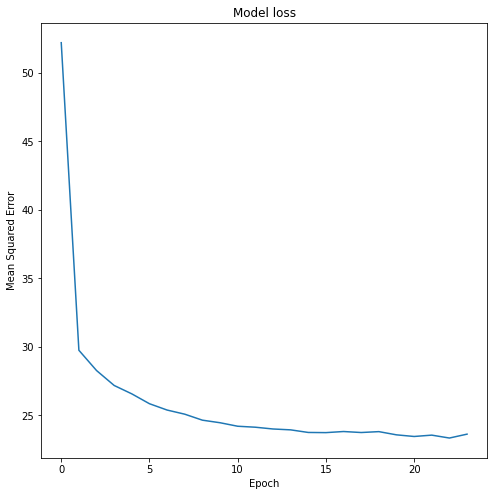

In [151]:
plt.figure(figsize=(8, 8))  #Plot of error VS. epochs
plt.plot(history.history['mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

Total marks: 21

Columns 2 to 10 represent the features of the dataset. The first column is the target. Answer the following questions

The dataset represents characteristics of people along with the associated salary earned per hour (in some scaled currency).

1) How many inputs would a neural network have if we tried to solve this problem?

2) How many outputs would the neural network have?

3) What is the goal here? What are we trying to achieve with machine learning?

<hr>

Implement a neural network in Tensorflow.

The total number of weights within the model should be less than 100. Make sure to print the number of parameters within your model.

Train for 24 epochs and use a batch size of 4. 

Predict on testing data (split the data into training and testing).

Determine the mean squared error on the test data

Plot the training loss and comment on the plot.